<a href="https://colab.research.google.com/github/shreyasgowdac-319/ML-LAB/blob/main/1BM23CS319_Lab_3_Logistic_Regression_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import os

file_name = 'HR_comma_sep.csv'
content_path = f'/content/{file_name}'

# Check for common existing paths first
if os.path.exists(content_path):
    print(f"'{file_name}' found at '{content_path}'. Loading from here.")
    actual_file_path = content_path
elif os.path.exists(file_name): # Check in current directory if already uploaded
    print(f"'{file_name}' found in current directory. Loading from here.")
    actual_file_path = file_name
else:
    print(f"'{file_name}' not found in expected locations. Attempting file upload...")
    try:
        uploaded = files.upload()
        if not uploaded:
            raise FileNotFoundError(f"No file was uploaded. Please ensure you upload '{file_name}'.")

        # Get the actual name of the uploaded file
        uploaded_file_name = list(uploaded.keys())[0]
        print(f"File '{uploaded_file_name}' uploaded successfully.")
        actual_file_path = uploaded_file_name # Use the actual uploaded file name

    except Exception as e:
        print(f"Error during file upload: {e}")
        raise FileNotFoundError(f"'{file_name}' still not found after attempted upload. Please upload the correct file manually.")

# Load the dataset using the determined actual_file_path
df = pd.read_csv(actual_file_path)

# Display the first 5 rows of the DataFrame
print(df.head())

'HR_comma_sep.csv' not found in expected locations. Attempting file upload...


Saving HR_comma_sep - HR_comma_sep.csv to HR_comma_sep - HR_comma_sep (2).csv
File 'HR_comma_sep - HR_comma_sep (2).csv' uploaded successfully.
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1             

In [ ]:
print("\n--- DataFrame Info ---\n")
df.info()

print("\n--- Descriptive Statistics for Numerical Columns ---\n")
print(df.describe())

print("\n--- Value Counts for 'left' Column ---\n")
print(df['left'].value_counts())
print(df['left'].value_counts(normalize=True) * 100)

print("\n--- Correlation Matrix (with focus on 'left') ---\n")
# Select only numerical columns for correlation calculation
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix['left'].sort_values(ascending=False))

print("\n--- Analysis of Categorical Columns ---\n")
categorical_cols = ['Department', 'salary']

for col in categorical_cols:
    print(f"\nValue Counts for '{col}':\n")
    print(df[col].value_counts())
    print(f"\nRetention by '{col}':\n")
    print(pd.crosstab(df[col], df['left'], normalize='index') * 100)



--- DataFrame Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

--- Descriptive Statistics for Numerical Columns ---

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
m

/tmp/ipython-input-251/1578158592.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportion_left.index, y=proportion_left.values, palette='viridis')


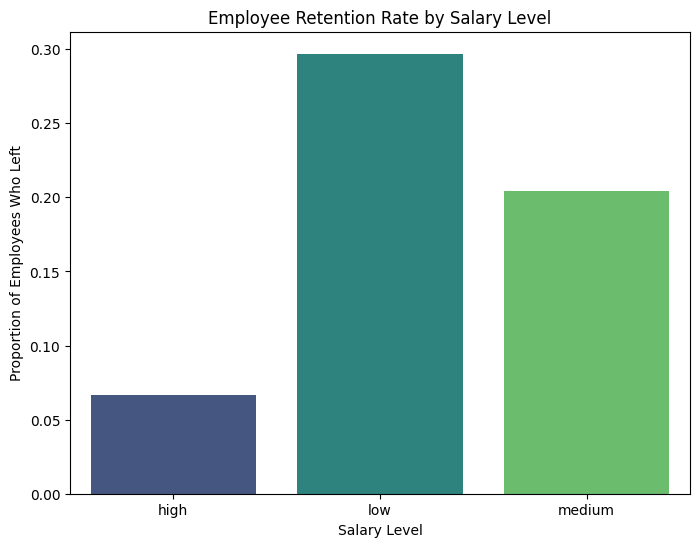

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the proportion of employees who left for each salary level
retention_by_salary = df.groupby('salary')['left'].value_counts(normalize=True).unstack()

# Select the proportion of employees who left (where 'left' == 1)
# Handle cases where a salary level might have no leavers (NaN) by filling with 0
proportion_left = retention_by_salary[1].fillna(0)

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=proportion_left.index, y=proportion_left.values, palette='viridis')

# Set title and labels
plt.title('Employee Retention Rate by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees Who Left')

# Display the plot
plt.show()

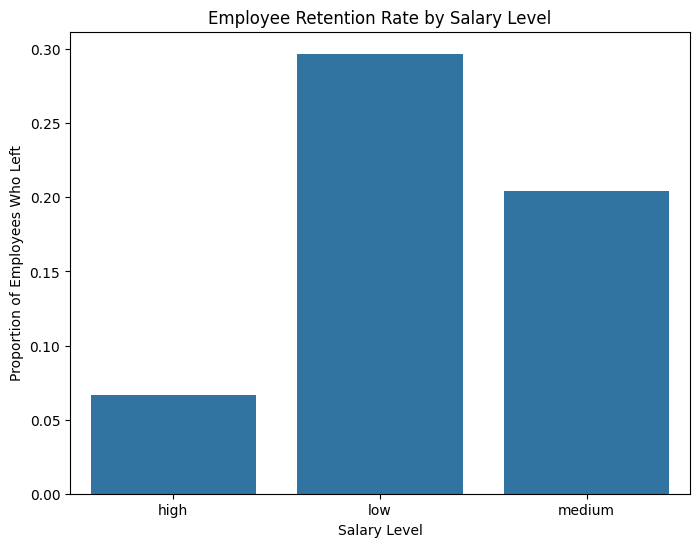

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the proportion of employees who left for each salary level
retention_by_salary = df.groupby('salary')['left'].value_counts(normalize=True).unstack()

# Select the proportion of employees who left (where 'left' == 1)
# Handle cases where a salary level might have no leavers (NaN) by filling with 0
proportion_left = retention_by_salary[1].fillna(0)

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=proportion_left.index, y=proportion_left.values)

# Set title and labels
plt.title('Employee Retention Rate by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees Who Left')

# Display the plot
plt.show()

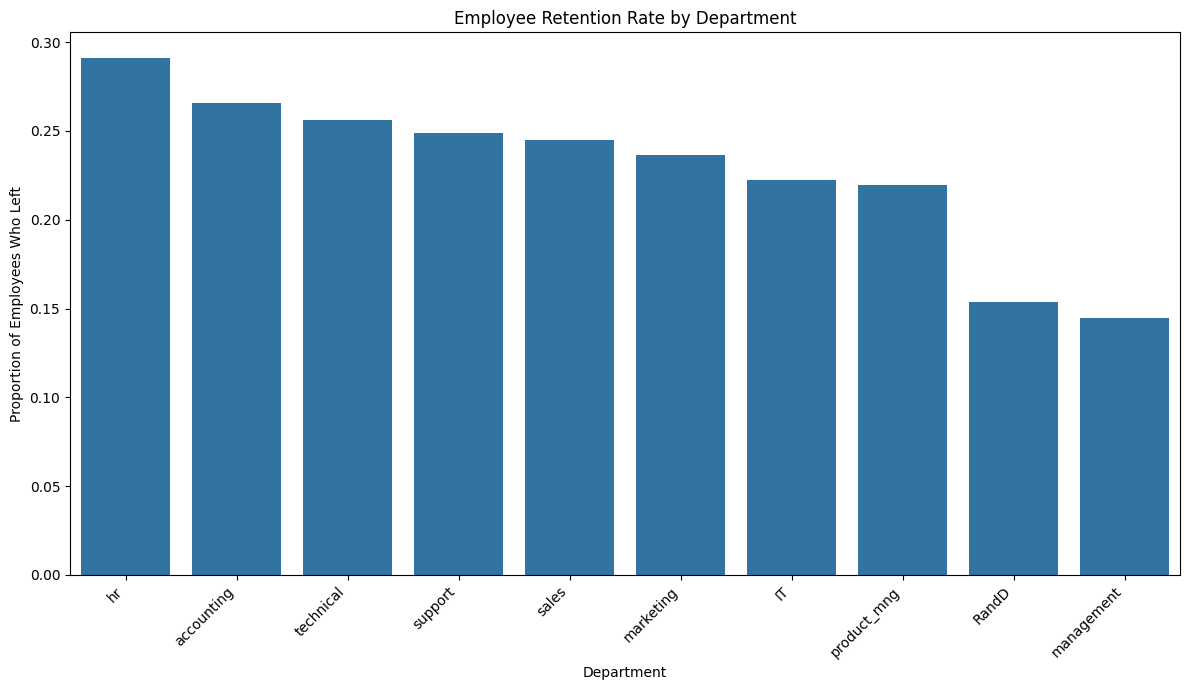

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the proportion of employees who left for each department
retention_by_department = df.groupby('Department')['left'].value_counts(normalize=True).unstack()

# Select the proportion of employees who left (where 'left' == 1)
# Handle cases where a department might have no leavers (NaN) by filling with 0
proportion_left_dept = retention_by_department[1].fillna(0).sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=proportion_left_dept.index, y=proportion_left_dept.values)

# Set title and labels
plt.title('Employee Retention Rate by Department')
plt.xlabel('Department')
plt.ylabel('Proportion of Employees Who Left')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Identify categorical and numerical features
categorical_features = ['Department', 'salary']
numerical_features = [
    'satisfaction_level', 'last_evaluation', 'number_project',
    'average_montly_hours', 'time_spend_company', 'Work_accident',
    'promotion_last_5years'
]
target_variable = 'left'

# 2. Convert categorical features into numerical format using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# 3. Create the feature matrix X and target vector y
X = df_encoded.drop(columns=[target_variable])
y = df_encoded[target_variable]

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing complete.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Data preprocessing complete.
Shape of X_train: (11999, 18)
Shape of X_test: (3000, 18)
Shape of y_train: (11999,)
Shape of y_test: (3000,)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Set random_state for reproducibility
model = LogisticRegression(random_state=42, solver='liblinear') # Using 'liblinear' solver for better convergence with small datasets

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.7813


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/zoo-data - zoo-data.csv')

# Display the first 5 rows of the DataFrame
print(df.head())

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

In [ ]:
print("--- DataFrame Info ---")
df.info()

print("\n--- Descriptive Statistics for Numerical Columns ---")
print(df.describe())

print("\n--- Value Counts for 'class_type' Column ---")
print(df['class_type'].value_counts())

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Identify the target variable 'class_type' and separate it into y
y = df['class_type']

# 2. Create the feature matrix X by dropping both the 'animal_name' column and the 'class_type' column
X = df.drop(columns=['animal_name', 'class_type'])

# 3. and 4. Import StandardScaler, instantiate, fit, and transform X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# 5. and 6. Import train_test_split and split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data preprocessing complete.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data preprocessing complete.
Shape of X_train: (80, 16)
Shape of X_test: (21, 16)
Shape of y_train: (80,)
Shape of y_test: (21,)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model for multiclass classification
# Set random_state for reproducibility
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=200)

# Train the model
model.fit(X_train, y_train)

print("Multiclass Logistic Regression model trained successfully.")

Multiclass Logistic Regression model trained successfully.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 1.0000

--- Classification Report ---
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



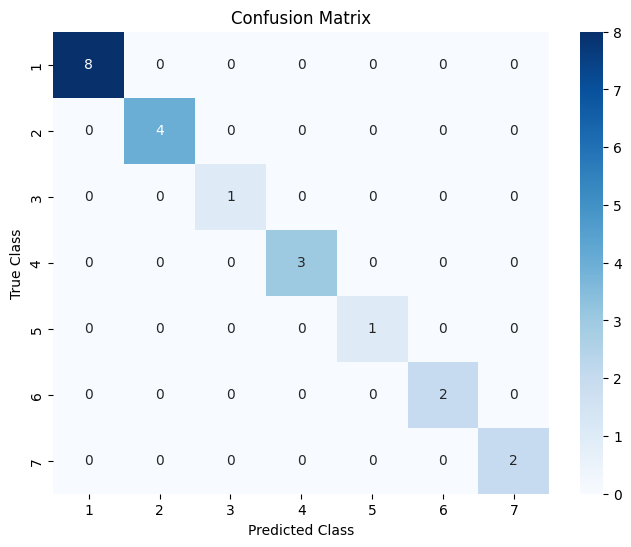

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print the classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()